# Multivariant Classification
Besides the binary classification, our logistic regression is also supporting multivariant classification(more than 2 classes). This notebook is to compare its performance with sklearn's in multivariant classification.   


The dataset is [Wireless Indoor Localization](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) , which is collected to perform experimentation on how wifi signal strengths can be used to determine one of the indoor locations(4 rooms).

In [1]:
import pandas as pd
df = pd.read_csv('wifi_localization.txt', sep='\t', header=None)

## Dataset Inspection

The following cells are showing the dataset's basic information. The first 7 columns are wifi signal strength observed on smartphones. And the last feature means where the smartphone is in four differernt rooms. 

In [2]:
# The dataset has no header
df.head()

,0,1,2,3,4,5,6,7
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


### Null value
Ther is no null value in this dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
 1   1       2000 non-null   int64
 2   2       2000 non-null   int64
 3   3       2000 non-null   int64
 4   4       2000 non-null   int64
 5   5       2000 non-null   int64
 6   6       2000 non-null   int64
 7   7       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


### Target
The last column is the target the trained model is going to predict. Here we can see there are four rooms (classification). 

In [4]:
df.iloc[:, -1].value_counts()

1    500
2    500
3    500
4    500
Name: 7, dtype: int64

# Pre-Processing


### Shuffle
There is not too much to do in terms of pre-processing. One thing is this dataset is well ordered by its room feature(from 1 to 4). To make sure the selected data is randomized enough, here I am going to shuffle the dataset twice.

In [5]:
from sklearn.utils import shuffle
df = shuffle(shuffle(df))

# Split dataset to features and target
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

### Re-assign labels
In this dataset, features are labeled from 1 to 4. However, my implementation can only take the target started from 0. I am going to substract the target column by 1.

In [6]:
target = target - 1
target.value_counts()

0    500
1    500
2    500
3    500
Name: 7, dtype: int64

### Standardize and Split

As we did in the binary classification, it is crucial to standardize the dataset because sklearn also does that. 

And again, this dataset will be splitted for training(80%) and testing(20%).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split data to train(80%) and test(20%) 
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=1)

# Because my implementation cannot take array-like features, so here I transform features to dataframe.
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)

# Performace Comparison


## My Logistic Regression vs SKlearn's
It time to test my version of logistic regression and sklearn's version.

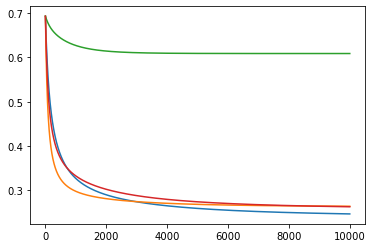

In [8]:
from LogisticRegression import LogisticRegression as MyLR
mylr = MyLR()
mylr.fit(train_x, train_y)
my_hyp = mylr.predict(test_x)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_x, train_y)
sk_hyp = clf.predict(test_x)

# Costs:

### Metrics
We will evaluate the explained_variance_score, accuracy_score and confusion_matrix to see the performace between the two versions.

In [9]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
my_evs = explained_variance_score(test_y, my_hyp)
my_acc = accuracy_score(test_y, my_hyp)
my_cm = confusion_matrix(test_y, my_hyp)

In [11]:
sk_evs = explained_variance_score(test_y, sk_hyp)
sk_acc = accuracy_score(test_y, sk_hyp)
sk_cm = confusion_matrix(test_y, sk_hyp)

In [12]:
print("My Explained Variance Score:", my_evs)
print("My Accuracy Score:", my_acc)
print("Comfusion Matrix:")
print(my_cm)

My Explained Variance Score: 0.8612857306634056
My Accuracy Score: 0.8725
Comfusion Matrix:
[[104   0   0   0]
 [  2  81   1   0]
 [  8  26  57  13]
 [  0   0   1 107]]


In [13]:
print("Sklearn's Explained Variance Score:", sk_evs)
print("Sklearn's Accuracy Score:", sk_acc)
print("Comfusion Matrix:")
print(sk_cm)

Sklearn's Explained Variance Score: 0.9694283093855091
Sklearn's Accuracy Score: 0.975
Comfusion Matrix:
[[103   0   1   0]
 [  0  80   4   0]
 [  1   3 100   0]
 [  0   0   1 107]]


# Conclusion

Please see the conclusion in Binary_Classification_Performace_Comparison.